/home/yamamoto/venvs/physics/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


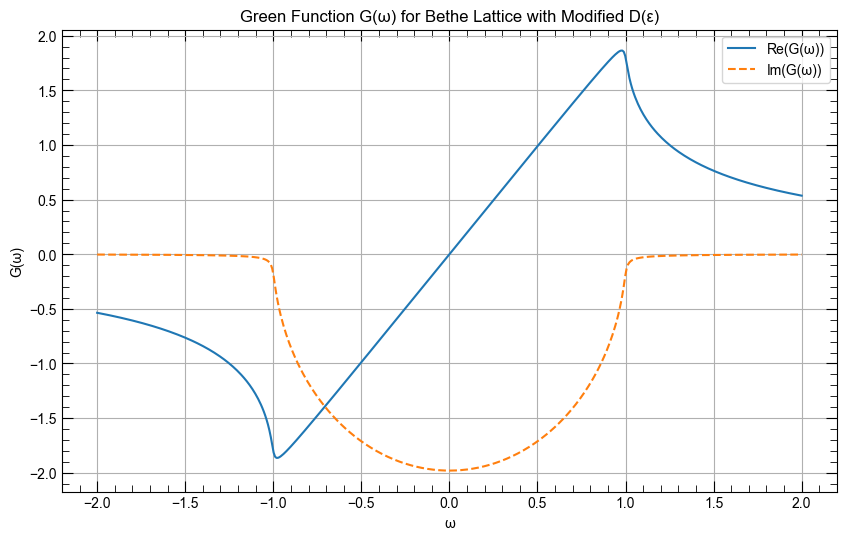

In [43]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


# ベーテ格子の密度分布関数 D(ε)
def density_of_states(epsilon, W, D_0):
    return (D_0 / W) * np.sqrt(W**2 - epsilon**2)


# グリーン関数 G(ω) の実部と虚部
def green_function_real(omega, W, D_0, delta):
    integrand = lambda epsilon: density_of_states(epsilon, W, D_0) / (
        omega - epsilon + 1j * delta
    )
    return np.real(quad(integrand, -W, W)[0])


def green_function_imag(omega, W, D_0, delta):
    integrand = lambda epsilon: np.imag(
        density_of_states(epsilon, W, D_0) / (omega - epsilon + 1j * delta)
    )
    return quad(integrand, -W, W)[0]


# パラメータの設定
W = 1.0  # 帯域幅
D_0 = 2.0 / np.pi  # 正規化定数 (D_0 = 2/π を仮定)
delta = 0.01  # 正の無限小量
omega_values = np.linspace(-2 * W, 2 * W, 500)  # ωの範囲

# グリーン関数の計算
G_real = np.array([green_function_real(omega, W, D_0, delta) for omega in omega_values])
G_imag = np.array([green_function_imag(omega, W, D_0, delta) for omega in omega_values])

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(omega_values, G_real, label="Re(G(ω))")
plt.plot(omega_values, G_imag, label="Im(G(ω))", linestyle="dashed")
plt.xlabel("ω")
plt.ylabel("G(ω)")
plt.title("Green Function G(ω) for Bethe Lattice with Modified D(ε)")
plt.legend()
plt.grid(True)
plt.show()

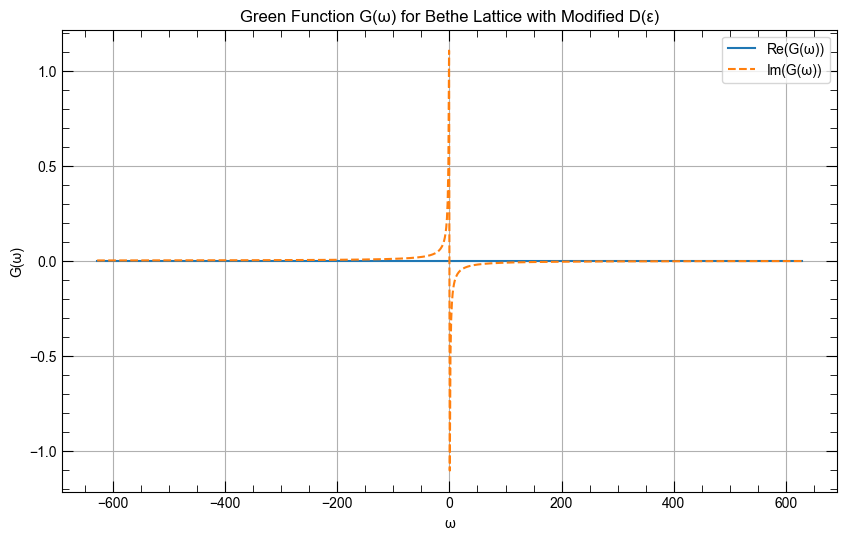

In [44]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


# ベーテ格子の密度分布関数 D(ε)
def density_of_states(epsilon, W, D_0):
    return (D_0 / W) * np.sqrt(W**2 - epsilon**2)


# グリーン関数 G(ω) の実部と虚部
def green_function_real(omega, W, D_0, delta):
    integrand = lambda epsilon: np.real(
        density_of_states(epsilon, W, D_0) / (omega - epsilon + 1j * delta)
    )
    return np.real(quad(integrand, -W, W)[0])


def green_function_imag(omega, W, D_0, delta):
    integrand = lambda epsilon: np.imag(
        density_of_states(epsilon, W, D_0) / (omega - epsilon + 1j * delta)
    )
    return quad(integrand, -W, W)[0]


def green_function(omega, W, D_0, delta):
    G_eral = green_function_real(omega, W, D_0, delta)
    G_imag = green_function_imag(omega, W, D_0, delta)
    return G_eral + 1j * G_imag


def make_gf_from_fourier(G_omega, omega_n, tau):
    return np.sum(G_omega * np.exp(-1j * omega_n * tau)) / beta


# パラメータの設定
W = 1.0  # 帯域幅
D_0 = 2.0 / np.pi  # 正規化定数 (D_0 = 2/π を仮定)
delta = 0.001  # 正の無限小量
beta = 32
# マツバラ周波数の定義
n_values = np.arange(-500, 500)  # nの範囲を決定
omega_n = (2 * n_values + 1) * np.pi / beta  # マツバラ周波数

# グリーン関数の計算
G = np.array([green_function(1.0j * omega, W, D_0, delta) for omega in omega_n])

tau_values = np.linspace(0, beta, 500)
G_tau = [make_gf_from_fourier(G, omega_n, tau) for tau in tau_values]

# 結果のプロット
plt.figure(figsize=(10, 6))
plt.plot(omega_n, G.real, label="Re(G(ω))")
plt.plot(omega_n, G.imag, label="Im(G(ω))", linestyle="dashed")
plt.xlabel("ω")
plt.ylabel("G(ω)")
plt.title("Green Function G(ω) for Bethe Lattice with Modified D(ε)")
plt.legend()
plt.grid(True)
plt.show()

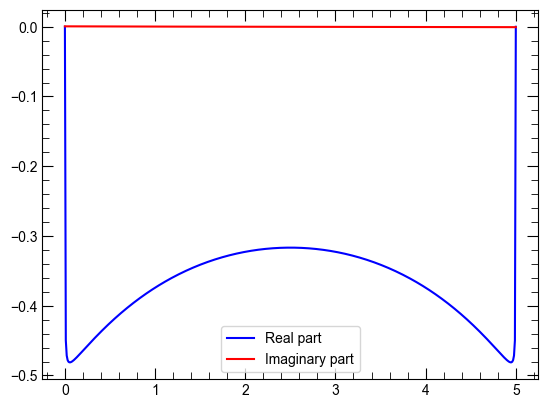

In [45]:
fig, ax = plt.subplots()
ax.plot(tau_values, np.real(G_tau), "b-", label="Real part")
ax.plot(tau_values, np.imag(G_tau), "r-", label="Imaginary part")
ax.legend()